In [4]:
%cd /home/plent/Documenten/Gitlab/NeuralODEs/jax_neural_odes

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from adjustText import adjust_text
import re
from scripts.analysis_helper_functions.helper_functions_SBML_analysis import *

/home/plent/Documenten/Gitlab/NeuralODEs/jax_neural_odes


In [5]:
#model information (number of parameters and state variables)
n_parameter={"Borghans_BiophysChem1997":24,
             "Beer_MolBioSystems2014":12,
             "Brannmark_JBC2010":18,
             "Zheng_PNAS2012":62,
             "mosbacher2022_mixed_Hog1_phosphorylation_l2v4":280,
             "Isensee_JCB2018":63,
             "Hass_PONE2017":37,
            "Palani2011":15,
            "Sneyd_PNAS2002":16,
            "Kinetic_glycolysis_assay_model":13,
            "Fujita_SciSignal2010":26,
            "Messiha2013":192,
            "Raia_CancerResearch":45,
            "Weber_BMC2015":53,
            "Crauste_CellSystems2017":16,
            "Fiedler_BMC2016":24,
            "Smallbone2013_SerineBiosynthesis":10,
            "Bruno_JExpBio2016":10,
            "Becker_Science2010":17,
            "Ray2013":20,
            "Chassagnole2002":117,
            "Bertozzi2020":36,
            "Schwen_PONE2014":19,
            "Garde2020":6,
            "Smallbone2011_TrehaloseBiosynthesis":52,
            "Elowitz_Nature2000":22}

n_state_variables={"Borghans_BiophysChem1997":3,
                                "Beer_MolBioSystems2014":4,
             "Brannmark_JBC2010":9,
             "Zheng_PNAS2012":15,
             "mosbacher2022_mixed_Hog1_phosphorylation_l2v4":95,
             "Isensee_JCB2018":25,
             "Hass_PONE2017":9,
                  "Palani2011":5,
                  "Sneyd_PNAS2002":6,
                  "Kinetic_glycolysis_assay_model":12,
                  "Fujita_SciSignal2010":26,
                  "Messiha2013":28,
                  "Raia_CancerResearch":14,
                  "Weber_BMC2015":7,
                  "Crauste_CellSystems2017":5,
                  "Fiedler_BMC2016":6,
                  "Smallbone2013_SerineBiosynthesis":2,
                  "Bruno_JExpBio2016":6,
                  "Becker_Science2010":6,
                  "Ray2013":6,
                  "Chassagnole2002":36,
                  "Bertozzi2020":3,
                  "Schwen_PONE2014":11,
                  "Garde2020":6,
                  "Smallbone2011_TrehaloseBiosynthesis":6,
                  "Elowitz_Nature2000":8}

literature_names={"Borghans_BiophysChem1997":'Borghans et. al (1997)',
                "Beer_MolBioSystems2014":"Beer et. al (2014)",
                "Brannmark_JBC2010":"Brannmark et. al (2010)",
                "Zheng_PNAS2012":"Zheng et. al (2012)",
                "mosbacher2022_mixed_Hog1_phosphorylation_l2v4":"Mosbacher et. al (2023)",
                "Isensee_JCB2018":"Isensee et. al (2018)",
                "Hass_PONE2017":"Hass et. al (2017)",
                  "Palani2011":'Palani et. al (2011)',
                  "Sneyd_PNAS2002":'Sneyd et. al (2002)',
                  "Kinetic_glycolysis_assay_model":'Nitin et. al (2013)',
                  "Fujita_SciSignal2010":'Fujita et. al (2010)',
                  "Messiha2013":'Messiha et. al (2014)',
                  "Raia_CancerResearch":'Raia et. al (2011)',
                  "Weber_BMC2015":'Weber et. al (2015)',
                  "Crauste_CellSystems2017":'Crauste et. al (2017)',
                  "Fiedler_BMC2016":'Fiedler et. al (2016)',
                  "Smallbone2013_SerineBiosynthesis":'Smallbone et. al (2013)',
                  "Bruno_JExpBio2016":'Bruno et. al (2016)',
                  "Becker_Science2010":'Becker et. al (2010)',
                  "Ray2013":'Ray et. al (2013)',
                  "Chassagnole2002":'Chassagnole et. al (2002)',
                  "Bertozzi2020":'Bertozzi et. al (2020)',
                  "Schwen_PONE2014":'Schwen et. al (2015)',
                  "Garde2020":'Garde et. al (2020)',
                  "Smallbone2011_TrehaloseBiosynthesis":'Smallbone et. al (2011)',
                  "Elowitz_Nature2000":'Elowitz et. al (2000)'}

In [455]:
#load the loss dataframes, params_dfs, and norms_dfs
model_names=os.listdir("results/EXP1_initialization_bounds_lhs_V2")


models_loss_dfs={}
for model_name in model_names:
    results_dir="results/EXP1_initialization_bounds_lhs_V2/"+model_name+"/"
    file_list=os.listdir(results_dir)
    print(model_name,len(file_list))
    loss_dfs,params_dfs,norms_dfs=retrieve_convergence_results(results_dir,file_list)

    #save models in another dictionary so that we can easily retrieve them for downstream analysis
    models_loss_dfs[model_name]=loss_dfs
    


Borghans_BiophysChem1997 45
Palani2011 15
Beer_MolBioSystems2014 45
Sneyd_PNAS2002 45
Isensee_JCB2018 45
mosbacher2022_mixed_Hog1_phosphorylation_l2v4 21
Kinetic_glycolysis_assay_model 19
Fujita_SciSignal2010 45
Messiha2013 45
Raia_CancerResearch 45
Weber_BMC2015 45
Brannmark_JBC2010 45
Crauste_CellSystems2017 45
Zheng_PNAS2012 45
Fiedler_BMC2016 45
Smallbone2013_SerineBiosynthesis 45
Bruno_JExpBio2016 45
Becker_Science2010 45
Hass_PONE2017 45
Chassagnole2002 33
Bertozzi2020 45
Schwen_PONE2014 45
Garde2020 33
Smallbone2011_TrehaloseBiosynthesis 45
Elowitz_Nature2000 45


In [456]:
#investigating single models for different bounds and their performance in loss.
run_names=["run_1","run_2","run_3"]
bound_names=["bounds_2","bounds_5","bounds_10","bounds_50","bounds_100"]

model_name_id="Messiha2013"

loss_dfs=models_loss_dfs[model_name_id]
percentage_per_bound={}
for bound_name in bound_names:
    percentage_below_threshold=[]
    for run_name in run_names:
        try:
            loss_dictionary_key=f"{model_name_id}_losses_id_lhs_N=100{run_name}{bound_name}.csv"

            loss_df_model=models_loss_dfs[model_name_id][loss_dictionary_key]


            thresholds=np.linspace(1e-6,1,100)

            percentage_per_thresh=[]
            for threshold in thresholds:
                count_below_threshold=0
                for col in range(np.shape(loss_df_model)[1]):
                    init_loss_df=np.array(loss_df_model.iloc[:,col].dropna().values)
                    # print(np.where(init_loss_df<threshold)[0])
                    if np.abs(init_loss_df[-1])<threshold:
                        count_below_threshold+=1

                percentage_per_thresh.append(count_below_threshold)
            percentage_below_threshold.append(percentage_per_thresh)
        except:
            continue
    percentage_below_threshold=np.mean(np.array(percentage_below_threshold),axis=0)
    percentage_per_bound[bound_name]=percentage_below_threshold



Text(0, 0.5, 'Percentage (in %)')

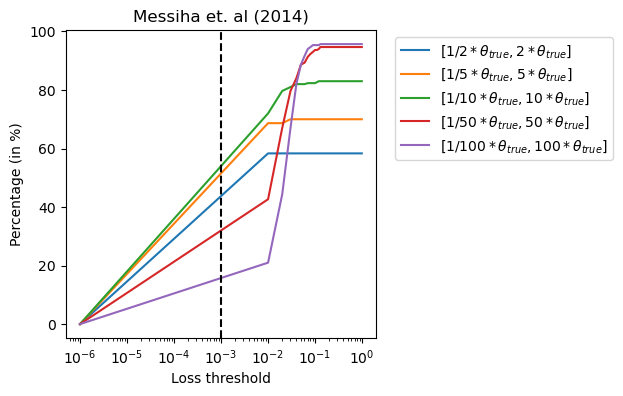

In [457]:
fig,ax=plt.subplots(figsize=(4,4))
ax.plot(thresholds,percentage_per_bound["bounds_2"],label="[$1/2*\\theta_{true},2*\\theta_{true}]$")
ax.plot(thresholds,percentage_per_bound["bounds_5"],label="[$1/5*\\theta_{true},5*\\theta_{true}]$")
ax.plot(thresholds,percentage_per_bound["bounds_10"],label="[$1/10*\\theta_{true},10*\\theta_{true}]$")
ax.plot(thresholds,percentage_per_bound["bounds_50"],label="[$1/50*\\theta_{true},50*\\theta_{true}]$")
ax.plot(thresholds,percentage_per_bound["bounds_100"],label="[$1/100*\\theta_{true},100*\\theta_{true}]$")
ax.legend(bbox_to_anchor=(1.04,1),loc="upper left")
ax.set_title(literature_names[model_name_id])
ax.set_xscale("log")
ax.axvline(1e-3,linestyle="--",c="black")
ax.set_xlabel("Loss threshold")
ax.set_ylabel("Percentage (in %)")

In [458]:
# plot of all models for a specific bound (lets do 2 and ten?)
run_names=["run_1","run_2","run_3"]
bound_name="bounds_10"



model_selection=["Garde2020","Becker_Science2010","Hass_PONE2017","Weber_BMC2015","Messiha2013"]
percentage_per_model={}
for model_name in model_selection:

    percentage_below_threshold=[]
    for run_name in run_names:
        loss_dictionary_key=f"{model_name}_losses_id_lhs_N=100{run_name}{bound_name}.csv"

        loss_df_model=models_loss_dfs[model_name][loss_dictionary_key]


        thresholds=np.linspace(1e-6,1,100)

        percentage_per_thresh=[]
        for threshold in thresholds:
            count_below_threshold=0
            for col in range(np.shape(loss_df_model)[1]):
                init_loss_df=np.array(loss_df_model.iloc[:,col].dropna().values)
                # print(np.where(init_loss_df<threshold)[0])
                if init_loss_df[-1]<threshold:
                    count_below_threshold+=1
            percentage_per_thresh.append(count_below_threshold)
        percentage_below_threshold.append(percentage_per_thresh)

    percentage_below_threshold=np.mean(np.array(percentage_below_threshold),axis=0)
    percentage_per_model[model_name]=percentage_below_threshold




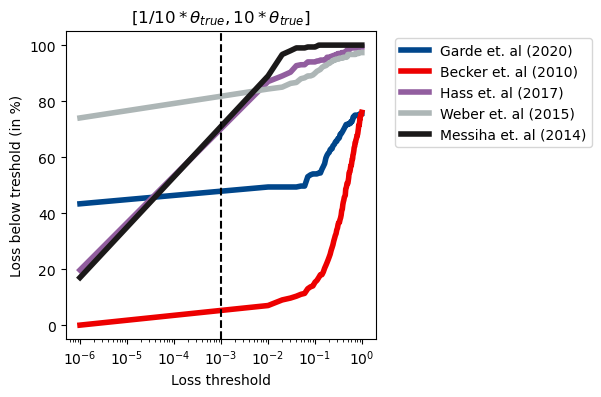

In [459]:
fig,ax=plt.subplots(figsize=(4,4))
mkeys=["Garde2020","Becker_Science2010","Hass_PONE2017","Weber_BMC2015","Messiha2013"]
c=["#00468BFF","#ED0000FF","#925E9FFF","#ADB6B6FF","#1B1919FF"]
for i,m_key in enumerate(mkeys):

    ax.plot(thresholds,percentage_per_model[m_key],label=literature_names[m_key],linewidth=4,c=c[i])
# ax.plot(thresholds,percentage_per_bound["bounds_5"],label="[$1/5*\\theta_{true},5*\\theta_{true}]$")
# ax.plot(thresholds,percentage_per_bound["bounds_10"],label="[$1/10*\\theta_{true},10*\\theta_{true}]$")
# ax.plot(thresholds,percentage_per_bound["bounds_50"],label="[$1/50*\\theta_{true},50*\\theta_{true}]$")
# ax.plot(thresholds,percentage_per_bound["bounds_100"],label="[$1/100*\\theta_{true},100*\\theta_{true}]$")
ax.legend(bbox_to_anchor=(1.04,1),loc="upper left")
# ax.set_title(literature_names[model_name_id])


ax.set_xscale("log")
ax.axvline(1e-3,linestyle="--",c="black")
ax.set_xlabel("Loss threshold")
ax.set_ylabel("Loss below treshold (in %)")
ax.set_title("[$1/10*\\theta_{true},10*\\theta_{true}]$")
fig.savefig("figures/threshold_plot_exp1/threshold_plots_five_models.svg",bbox_inches="tight")
fig.savefig("figures/threshold_plot_exp1/threshold_plots_five_models.png",bbox_inches="tight")

## Make the heatmaps, as well as diagonal heatmaps

In [460]:
#results directory
model_names=os.listdir("results/EXP1_initialization_bounds_lhs_V2")



models_loss_dfs={}
for model_name in model_names:
    print(model_name)
    results_dir="results/EXP1_initialization_bounds_lhs_V2/"+model_name+"/"
    file_list=os.listdir(results_dir)
    loss_dfs,params_dfs,norms_dfs=retrieve_convergence_results(results_dir,file_list)
    models_loss_dfs[model_name]=loss_dfs




Borghans_BiophysChem1997
Palani2011
Beer_MolBioSystems2014
Sneyd_PNAS2002
Isensee_JCB2018
mosbacher2022_mixed_Hog1_phosphorylation_l2v4
Kinetic_glycolysis_assay_model
Fujita_SciSignal2010
Messiha2013
Raia_CancerResearch
Weber_BMC2015
Brannmark_JBC2010
Crauste_CellSystems2017
Zheng_PNAS2012
Fiedler_BMC2016
Smallbone2013_SerineBiosynthesis
Bruno_JExpBio2016
Becker_Science2010
Hass_PONE2017
Chassagnole2002
Bertozzi2020
Schwen_PONE2014
Garde2020
Smallbone2011_TrehaloseBiosynthesis
Elowitz_Nature2000


In [447]:



run_names=["run_1","run_2","run_3"]
bound_names=["bounds_2","bounds_5","bounds_10","bounds_50","bounds_100"]



heatmap_array_init=np.zeros((len(model_names),len(bound_names)))
for i,model_name in enumerate(model_names):
    for k,bound_name in enumerate(bound_names):
        counts=[]
        for run in run_names:
            try:
                loss_dictionary_key=f"{model_name}_losses_id_lhs_N=100{run}{bound_name}.csv"
                loss_df_model=models_loss_dfs[model_name][loss_dictionary_key]
                count_inits=0
                for col in range(np.shape(loss_df_model)[1]):
                    loss_iter=loss_df_model.iloc[:,col].dropna().values
                    init_value=loss_iter[0]

                    if init_value!=-1:
                        count_inits+=1
                counts.append(count_inits)
            except:
                avg_counts=0
            avg_counts=np.mean(np.array(counts))
            heatmap_array_init[i,k]=avg_counts

heatmap_array_succes=np.zeros((len(model_names),len(bound_names)))
for i,model_name in enumerate(model_names):
    for k,bound_name in enumerate(bound_names):
        counts=[]
        for run in run_names:
            try:
                loss_dictionary_key=f"{model_name}_losses_id_lhs_N=100{run}{bound_name}.csv"
                loss_df_model=models_loss_dfs[model_name][loss_dictionary_key]
                count_inits=0
                for col in range(np.shape(loss_df_model)[1]):
                    loss_iter=loss_df_model.iloc[:,col].dropna().values
                    init_value=loss_iter[-1]

                    if np.abs(init_value)<=1e-3:
                        count_inits+=1
                counts.append(count_inits)
            except:
                avg_counts=0
            avg_counts=np.mean(np.array(counts))
            heatmap_array_succes[i,k]=avg_counts

heatmap_array_init=pd.DataFrame(heatmap_array_init,columns=bound_names,index=model_names).T
heatmap_array_succes=pd.DataFrame(heatmap_array_succes,columns=bound_names,index=model_names).T

/home/plent/anaconda3/envs/jax_env/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/plent/anaconda3/envs/jax_env/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [474]:
sorted_model_names=list(pd.Series(n_parameter).sort_values().keys())
heatmap_array_init=heatmap_array_init.reindex(sorted_model_names,axis=1)
heatmap_array_succes=heatmap_array_succes.reindex(sorted_model_names,axis=1)
sorted_params=list(pd.Series(n_parameter).sort_values().values)


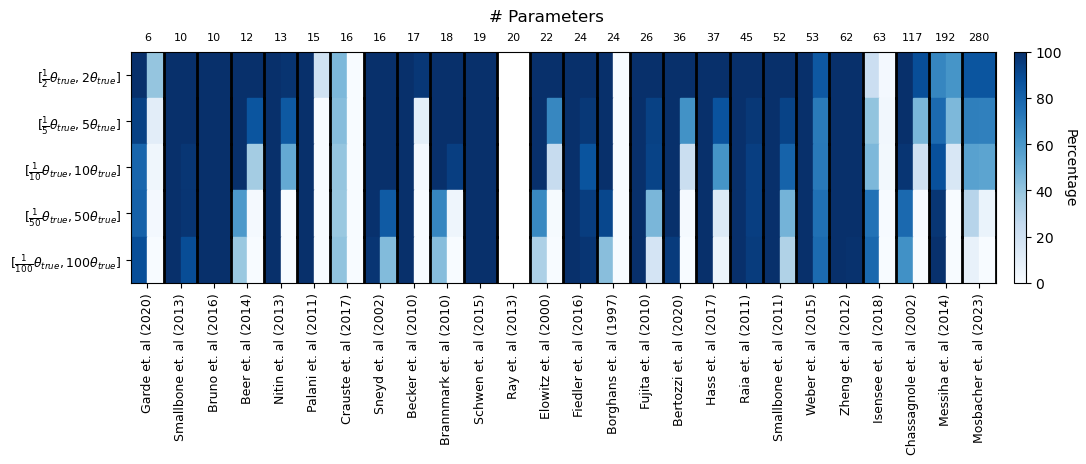

In [490]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.lines as lines

# Sample data
data1 = np.array(heatmap_array_init) # Replace with your first dataset
data2 = np.array(heatmap_array_succes) # Replace with your second dataset

data1_normalized = data1 / 100
data2_normalized = data2 / 100

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12,3))

# Define the size of the grid
nrows, ncols = data1.shape

# Loop over data dimensions and create lower and upper triangles
for i in range(nrows):
    for j in range(ncols):
        # Coordinates of the corners of the cell
        x = j
        y = nrows - i - 1
        
        # Values from the datasets (already normalized)
        value1 = data1_normalized[i, j]
        value2 = data2_normalized[i, j]
        
        # Define the colors based on the normalized values in greyscale
        color1 = plt.cm.Blues(value1)  # Lower triangle uses dataset1 value
        color2 = plt.cm.Blues(value2)  # Upper triangle uses dataset2 value
        
        # Draw left half (dataset1)
        left_rect = patches.Rectangle((x, y), 0.5, 1, color=color1)
        ax.add_patch(left_rect)
        
        # Draw right half (dataset2)
        right_rect = patches.Rectangle((x + 0.5, y), 0.5, 1, color=color2)
        ax.add_patch(right_rect)

        # Add vertical lines to separate left and right halves
        vertical_line = lines.Line2D([x + 1, x + 1], [y, y + 1], color='black', linewidth=2)
        ax.add_line(vertical_line)

ax.set_xlim(0, ncols)
ax.set_ylim(0, nrows)
y_labels = [r"[$\frac{1}{2}\theta_{true}, 2\theta_{true}]$",
            r"[$\frac{1}{5}\theta_{true}, 5\theta_{true}]$",
            r"[$\frac{1}{10}\theta_{true}, 10\theta_{true}]$",
            r"[$\frac{1}{50}\theta_{true}, 50\theta_{true}]$",
            r"[$\frac{1}{100}\theta_{true}, 100\theta_{true}]$"]

# Set y-tick positions and corresponding labels
ax.set_yticks([4.5, 3.5, 2.5,1.5, 0.5], y_labels,fontsize=9)

x_labels=[literature_names[model_name] for model_name in sorted_model_names]
ax.set_xticks(np.arange(0,26,1)+0.5,x_labels,rotation=90,fontsize=9)

# Add parameter numbers at the top of each column
for j, param_num in enumerate(sorted_params):
    ax.text(j + 0.5, nrows + 0.2, str(param_num), ha='center', va='bottom', fontsize=8)

#Add labels for '# Parameters' and 'Initialization success rate' above the heatmap
n_params = len(sorted_params)
ax.text(n_params / 2 - 0.5, nrows + 0.6, '# Parameters', ha='center', va='bottom', fontsize=12, color='black')



sm = plt.cm.ScalarMappable(cmap="Blues", norm=plt.Normalize(vmin=0, vmax=100))
sm.set_array([])  # Dummy mappable for the colorbar
cbar = plt.colorbar(sm, ax=ax,fraction=0.05,pad=0.02)
cbar.set_label('Percentage', rotation=270, labelpad=10)
# Invert y-axis to match typical matrix layout
# ax.invert_yaxis()



In [477]:
sorted_params

[6,
 10,
 10,
 12,
 13,
 15,
 16,
 16,
 17,
 18,
 19,
 20,
 22,
 24,
 24,
 26,
 36,
 37,
 45,
 52,
 53,
 62,
 63,
 117,
 192,
 280]